In [1]:
Install essential libraries (run once)
!pip install pandas requests matplotlib

In [2]:
# Cell 2: Get Bitcoin prices
import requests
import pandas as pd

# CoinGecko API endpoint
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=90"

# Fetch data
response = requests.get(url)
print("API Status:", response.status_code)  # Should show 200 if successful

# Convert to Python dictionary
data = response.json()

API Status: 200


In [3]:
print("Available keys:", data.keys())  # Should show 'prices', 'market_caps', 'total_volumes'

Available keys: dict_keys(['prices', 'market_caps', 'total_volumes'])


In [4]:
# Cell 4: Create a clean DataFrame
# Extract prices (list of [timestamp, price])
prices = data['prices']

# Create DataFrame
df = pd.DataFrame(prices, columns=['timestamp', 'price'])

# Convert timestamp to readable date
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Remove timestamp column
df = df.drop('timestamp', axis=1)

# Show first 5 rows
df.head()

,price,date
0,83064.709855,2025-03-17 01:09:39.987
1,83208.950298,2025-03-17 02:04:49.745
2,83260.166525,2025-03-17 03:04:59.644
3,83712.823266,2025-03-17 04:04:51.969
4,83431.480572,2025-03-17 05:08:24.494


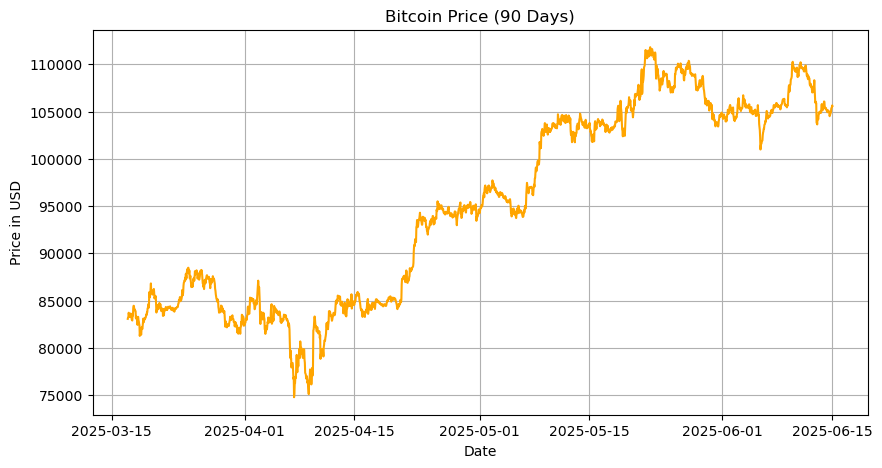

In [5]:
# Cell 5: Create your first chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['price'], color='orange')
plt.title("Bitcoin Price (90 Days)")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.grid(True)
plt.show()

In [6]:
# Cell 6: Find unusual price movements
# Calculate 7-day moving average
df['7d_ma'] = df['price'].rolling(window=7).mean()

# Flag prices 3% above/below average
df['anomaly'] = abs(df['price'] - df['7d_ma']) / df['7d_ma'] > 0.03

# Show anomalies
anomalies = df[df['anomaly'] == True]
print(f"Found {len(anomalies)} potential anomalies!")

Found 7 potential anomalies!


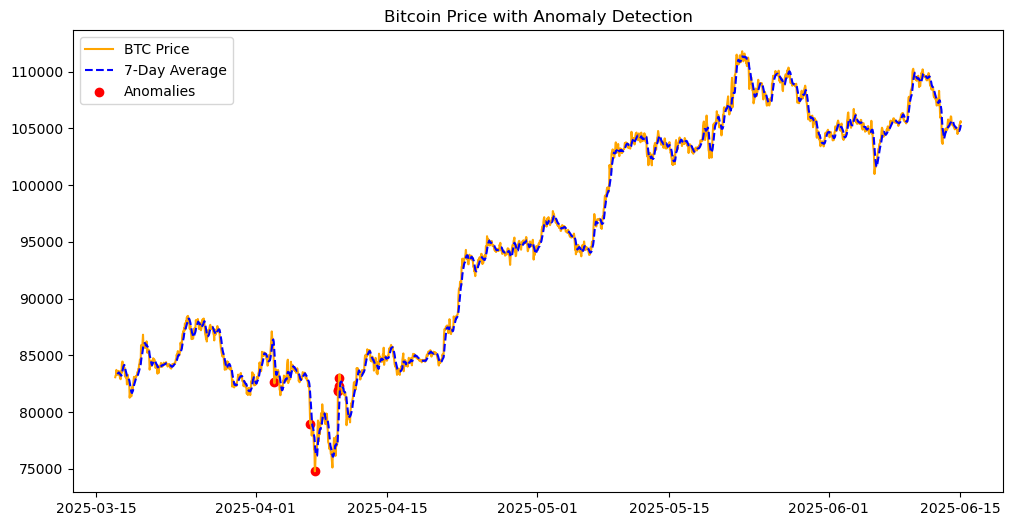

In [7]:
# Cell 7: Highlight anomalies on chart
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price'], label='BTC Price', color='orange')
plt.plot(df['date'], df['7d_ma'], label='7-Day Average', linestyle='--', color='blue')

# Plot anomalies as red dots
plt.scatter(anomalies['date'], anomalies['price'], color='red', label='Anomalies')

plt.title("Bitcoin Price with Anomaly Detection")
plt.legend()
plt.show()

In [8]:
# Cell 8: Save results
# Save DataFrame to CSV
df.to_csv("bitcoin_analysis.csv", index=False)

# Save the chart
plt.savefig('bitcoin_analysis.png')

print("✅ Day 1 Complete! Saved CSV and chart")

✅ Day 1 Complete! Saved CSV and chart


<Figure size 640x480 with 0 Axes>

In [10]:
df['daily_return'] = df['price'].pct_change() * 100  # Daily percentage change

# Show most volatile days
volatile_days = df[abs(df['daily_return']) > 5]
print(f"Found {len(volatile_days)} days with >5% moves:")
volatile_days[['date', 'daily_return']].head()

Found 0 days with >5% moves:


,date,daily_return
